<a href="https://colab.research.google.com/github/nishantbhandari-sys/digitRecognition/blob/main/digitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

# Loading - "MNIST Data Set"

Training Samples = 60,000 , Testing Samples = 10,000 .



In [20]:
mnist = tf.keras.datasets.mnist   # handwritten dataset of 0-9 digits, sized 28*28

# Divide into Training and Testing Datasets

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train.shape

(60000, 28, 28)

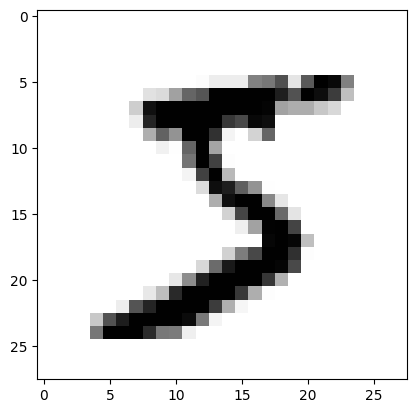

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
# plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

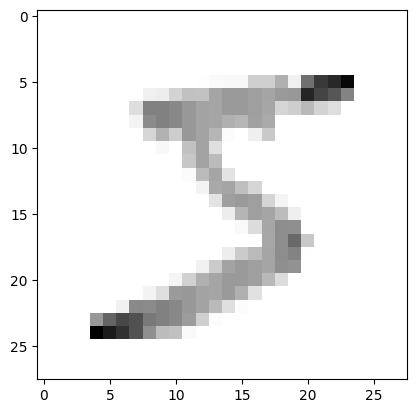

In [24]:
# print(x_train[0])

### as it's gray image and values varies from 0 to 255
### in order to normalize it

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

# print(x_train[0])

# Resizing Image for applying Convolution Operation

In [30]:
import numpy as np

img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)  ### increasing one dimension for kernel/filter operation
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)

print("Training sample dimen", x_trainr.shape)
print("Test sample dimen", x_testr.shape)

Training sample dimen (60000, 28, 28, 1)
Test sample dimen (10000, 28, 28, 1)


# Creating a Deep Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [46]:
####  creating a neural network
model = Sequential()

####  1st Convolution layer (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


####  2nd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


####  3rd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


####  Fully Connected Layer # 1  20*20= 400
model.add (Flatten())  ### Before using fully connected, flatten 2D to 1D
model.add (Dense(64))
model.add (Activation("relu"))


####  Fully Connected Layer # 2
model.add (Dense(32))
model.add (Activation("relu"))


####  Last Fully Connected Layer
model.add (Dense(10))
model.add (Activation("softmax"))  ###   change to softmax (class probabilities)

In [47]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_14 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_15 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 106s 78ms/step - loss: 0.3115 - accuracy: 0.9022 - val_loss: 0.1367 - val_accuracy: 0.9584
Epoch 2/5
1313/1313 [==============================] - 102s 77ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 0.0901 - val_accuracy: 0.9729
Epoch 3/5
1313/1313 [==============================] - 103s 79ms/step - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0744 - val_accuracy: 0.9762
Epoch 4/5
1313/1313 [==============================] - 101s 77ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0778 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0680 - val_accuracy: 0.9806


In [51]:
####    Evaluating on testing dataset

test_loss, test_acc = model.evaluate(x_testr, y_test)

print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0677 - accuracy: 0.9807
Test Loss on 10,000 test samples 0.06773842126131058
Test Accuracy on 10,000 test samples 0.9807000160217285


In [52]:
predictions = model.predict([x_testr])

313/313 [==============================] - 5s 16ms/step


In [53]:
print(predictions)

[[1.1060391e-09 3.8614740e-08 1.1099738e-06 ... 9.9999791e-01
  3.5258494e-09 3.5908283e-08]
 [4.5690489e-05 7.3380957e-06 9.9993557e-01 ... 1.4053347e-07
  2.2026911e-06 1.4475416e-06]
 [1.4471452e-06 9.9998885e-01 2.4601561e-06 ... 1.9274614e-07
  6.9013669e-07 9.8308840e-07]
 ...
 [5.3348831e-08 5.8081508e-08 1.2133728e-07 ... 1.3809995e-08
  5.6532758e-06 2.7838265e-05]
 [3.2632306e-05 4.6238814e-08 5.4818884e-07 ... 3.9005002e-08
  5.7854806e-05 4.9975322e-05]
 [5.7464361e-04 5.4518168e-06 9.1498229e-04 ... 7.3875782e-08
  5.0663682e-05 7.8400779e-05]]


In [54]:
print(np.argmax(predictions[0]))

7


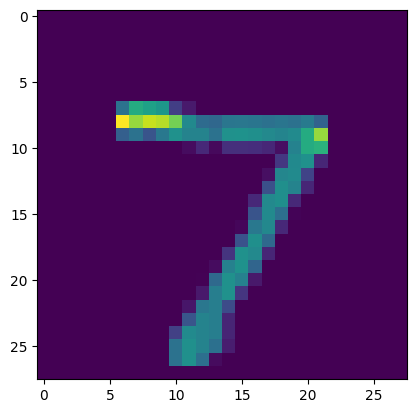

In [55]:
plt.imshow(x_test[0])